Mean Squared Error (MSE): 5.0669524275278555
Root Mean Squared Error (RMSE): 2.250989210886595
R² skoru: 0.999470645020129


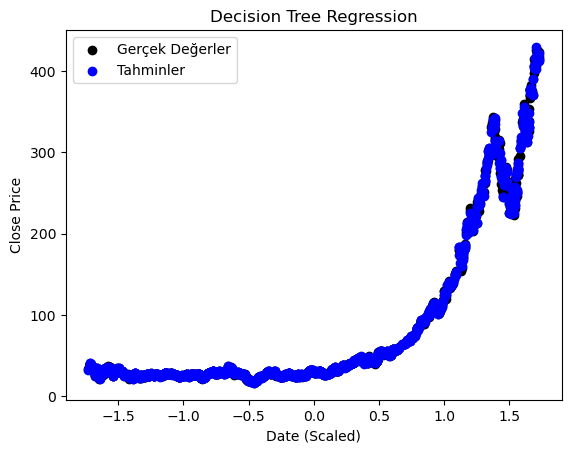

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi oku
tesla = pd.read_csv("C:/Users/onurs/Downloads/MSFT.csv")

# Tarih sütununu datetime tipine dönüştür
tesla['Date'] = pd.to_datetime(tesla['Date'])

# Tarih ve kapanış fiyatlarını ayır
X = tesla['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = tesla['Close'].values

# Tarihleri yeniden ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Karar ağacı regresyon modelini oluştur ve eğit
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans ölçütlerini hesapla
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdır
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² skoru:", r2)

# Tahminlerin ve gerçek değerlerin görselleştirilmesi
plt.scatter(X_test, y_test, color='black', label='Gerçek Değerler')
plt.scatter(X_test, y_pred, color='blue', label='Tahminler')
plt.xlabel('Date (Scaled)')
plt.ylabel('Close Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


In [2]:
# Eğitim seti tahminleri
y_train_pred = model.predict(X_train)

# Eğitim seti performans ölçütleri
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Sonuçları yazdır
print("Eğitim Seti - Mean Squared Error (MSE):", mse_train)
print("Eğitim Seti - Root Mean Squared Error (RMSE):", rmse_train)
print("Eğitim Seti - R² skoru:", r2_train)


Eğitim Seti - Mean Squared Error (MSE): 0.0
Eğitim Seti - Root Mean Squared Error (RMSE): 0.0
Eğitim Seti - R² skoru: 1.0


En İyi Model - Eğitim Seti - Mean Squared Error (MSE): 0.9148151986717543
En İyi Model - Eğitim Seti - Root Mean Squared Error (RMSE): 0.956459721405849
En İyi Model - Eğitim Seti - R² skoru: 0.9999049094172952
En İyi Model - Test Seti - Mean Squared Error (MSE): 4.731383764854895
En İyi Model - Test Seti - Root Mean Squared Error (RMSE): 2.175174421708497
En İyi Model - Test Seti - R² skoru: 0.9995057025710365


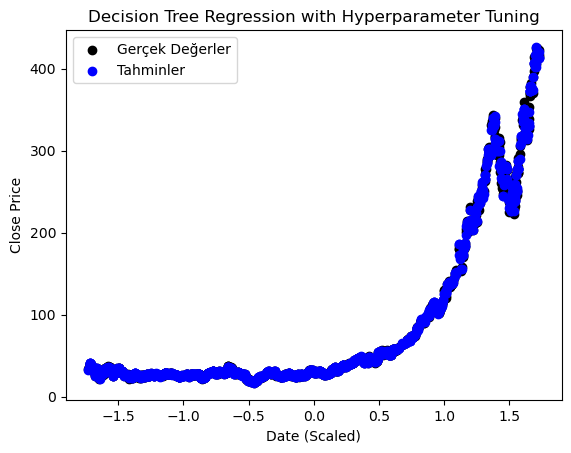

In [3]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre grid'i oluştur
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# GridSearchCV ile en iyi hiperparametreleri bul
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_model = grid_search.best_estimator_

# En iyi model ile tahmin yap
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Eğitim seti performans ölçütleri
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Test seti performans ölçütleri
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdır
print("En İyi Model - Eğitim Seti - Mean Squared Error (MSE):", mse_train)
print("En İyi Model - Eğitim Seti - Root Mean Squared Error (RMSE):", rmse_train)
print("En İyi Model - Eğitim Seti - R² skoru:", r2_train)

print("En İyi Model - Test Seti - Mean Squared Error (MSE):", mse_test)
print("En İyi Model - Test Seti - Root Mean Squared Error (RMSE):", rmse_test)
print("En İyi Model - Test Seti - R² skoru:", r2_test)

# Tahminlerin ve gerçek değerlerin görselleştirilmesi
plt.scatter(X_test, y_test, color='black', label='Gerçek Değerler')
plt.scatter(X_test, y_test_pred, color='blue', label='Tahminler')
plt.xlabel('Date (Scaled)')
plt.ylabel('Close Price')
plt.title('Decision Tree Regression with Hyperparameter Tuning')
plt.legend()
plt.show()


En İyi Model - Eğitim Seti - Mean Squared Error (MSE): 0.9148151986717543
En İyi Model - Eğitim Seti - Root Mean Squared Error (RMSE): 0.956459721405849
En İyi Model - Eğitim Seti - R² skoru: 0.9999049094172952
En İyi Model - Test Seti - Mean Squared Error (MSE): 4.731383764854895
En İyi Model - Test Seti - Root Mean Squared Error (RMSE): 2.175174421708497
En İyi Model - Test Seti - R² skoru: 0.9995057025710365


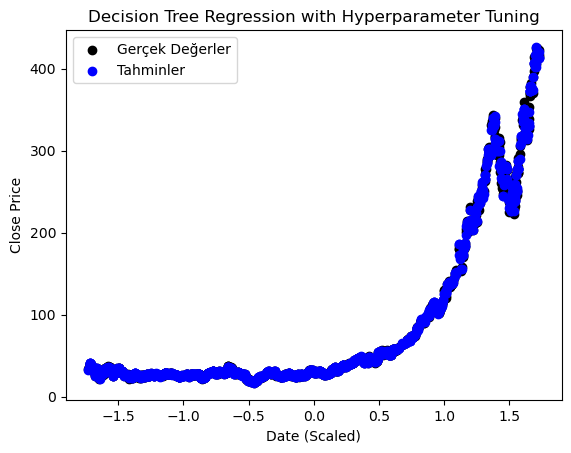

In [4]:
# Sonuçları yazdır
print("En İyi Model - Eğitim Seti - Mean Squared Error (MSE):", mse_train)
print("En İyi Model - Eğitim Seti - Root Mean Squared Error (RMSE):", rmse_train)
print("En İyi Model - Eğitim Seti - R² skoru:", r2_train)

print("En İyi Model - Test Seti - Mean Squared Error (MSE):", mse_test)
print("En İyi Model - Test Seti - Root Mean Squared Error (RMSE):", rmse_test)
print("En İyi Model - Test Seti - R² skoru:", r2_test)

# Tahminlerin ve gerçek değerlerin görselleştirilmesi
plt.scatter(X_test, y_test, color='black', label='Gerçek Değerler')
plt.scatter(X_test, y_test_pred, color='blue', label='Tahminler')
plt.xlabel('Date (Scaled)')
plt.ylabel('Close Price')
plt.title('Decision Tree Regression with Hyperparameter Tuning')
plt.legend()
plt.show()
